<a href="https://colab.research.google.com/github/JvSecate/PDI/blob/main/Atividades/Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Atividade Morfologia

In [62]:
import numpy as np
from PIL import Image
import scipy as sp
import matplotlib.pyplot as plt

In [63]:
def plot(img, img1, titulo1, img2, titulo2, img3, titulo3, img4, titulo4):
  # Plot usando matplotlib
  fig, ax = plt.subplots(nrows=1, ncols=5)
  fig.set_dpi(240)
  ax[0].imshow(img, cmap='gray')
  ax[0].set_title("Original")
  ax[0].axis("off")
  ax[1].imshow(img1, cmap='gray')
  ax[1].set_title(titulo1)
  ax[1].axis("off")
  ax[2].imshow(img2, cmap='gray')
  ax[2].set_title(titulo2)
  ax[2].axis("off")
  ax[3].imshow(img3, cmap='gray')
  ax[3].set_title(titulo3)
  ax[3].axis("off")
  ax[4].imshow(img4, cmap='gray')
  ax[4].set_title(titulo4)
  ax[4].axis("off")
  plt.show()

In [64]:
def plot2(img, imgNew, titulo):
  # Plot usando matplotlib
  fig, ax = plt.subplots(nrows=1, ncols=2)
  fig.set_dpi(350)
  ax[0].imshow(img, cmap='gray')
  ax[0].set_title("Imagem Original")
  ax[1].imshow(imgNew, cmap='gray')
  ax[1].set_title(titulo)
  plt.show()

In [65]:
#Abrir imagens
images = [Image.open('images/fingerprint.tif'),
          Image.open('images/Imagem1.tif'),
          Image.open('images/Imagem2.tif'),
          Image.open('images/morfologia1.tif'),
          Image.open('images/morfologia2.tif'),
          Image.open('images/noise_rectangle.tif'),
          Image.open('images/text_gaps.tif'),
          Image.open('images/rosto_perfil.tif')]

###1. Implemente a erosão/dilatação utilizando os seguintes elementos estruturantes e utilize todas as imagens:

In [66]:
Cross = ([[0, 1, 0],
      [1, 1, 1],
      [0, 1, 0]])

Sqr = ([[1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]])

Line = ([[1],
      [1],
      [1],
      [1],
      [1],
      [1],
      [1]])

Prism = ([[0, 0, 0, 1, 0, 0, 0],
      [0, 0, 1, 1, 1, 0, 0],
      [0, 1, 1, 1, 1, 1, 0],
      [1, 1, 1, 1, 1, 1, 1],
      [0, 1, 1, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 0, 0],
      [0, 0, 0, 1, 0, 0, 0]])

In [67]:
def erosaodilatacao(img, forma, erosao, quant):
  #Converte e copia imagem para uma matriz Numpy
  npImage = np.array(img)

  if erosao: image_out = sp.ndimage.binary_erosion(npImage, forma, quant)
  else: image_out = sp.ndimage.binary_dilation(npImage, forma, quant)
  return image_out

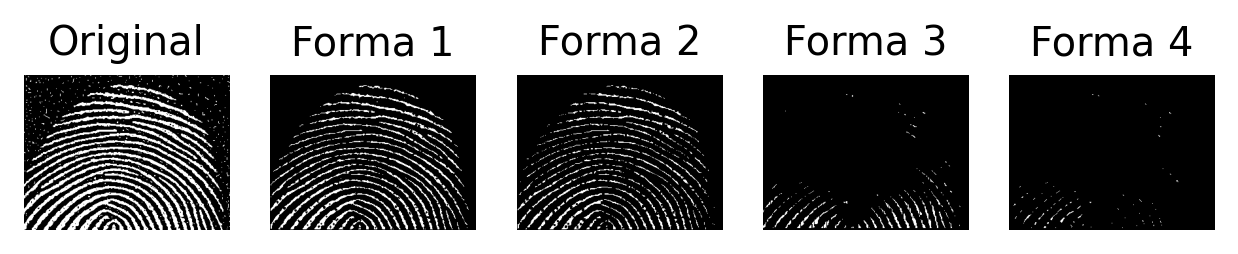

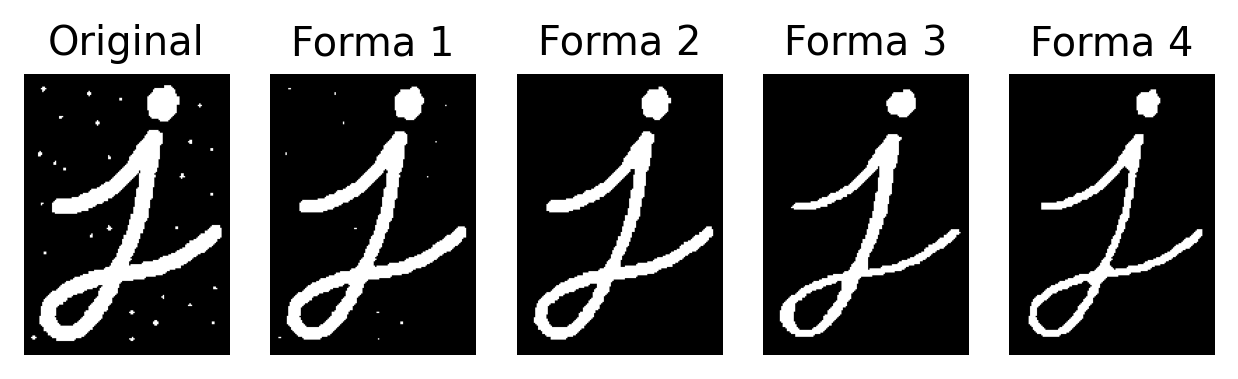

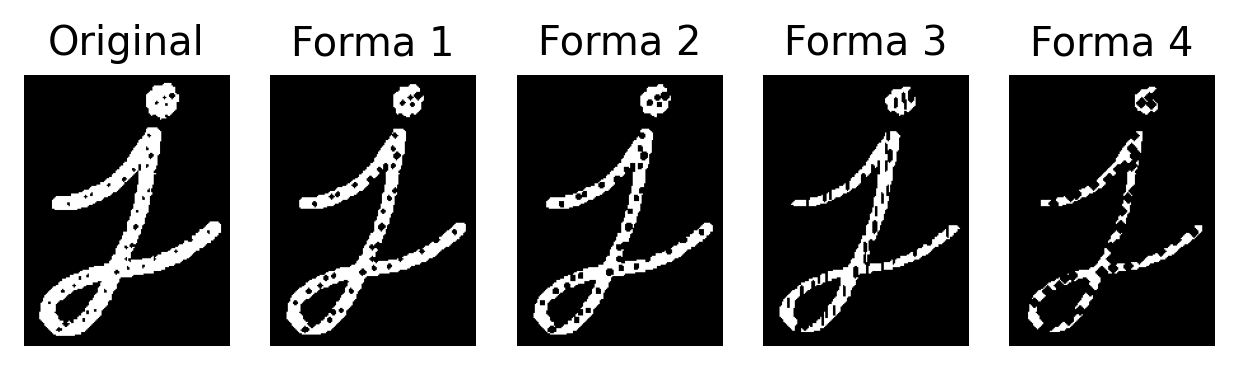

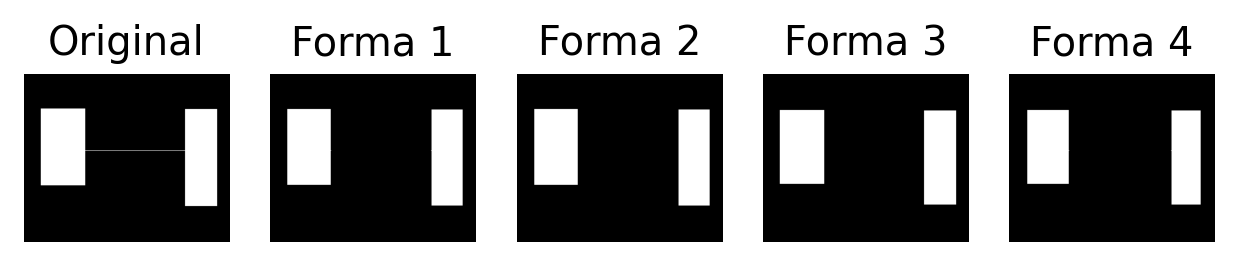

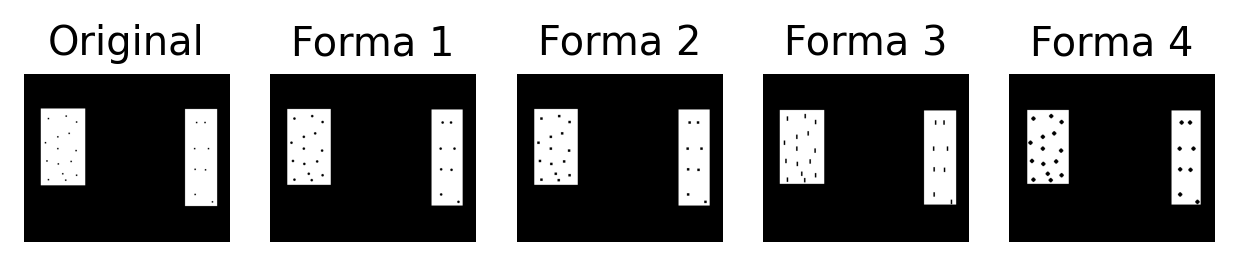

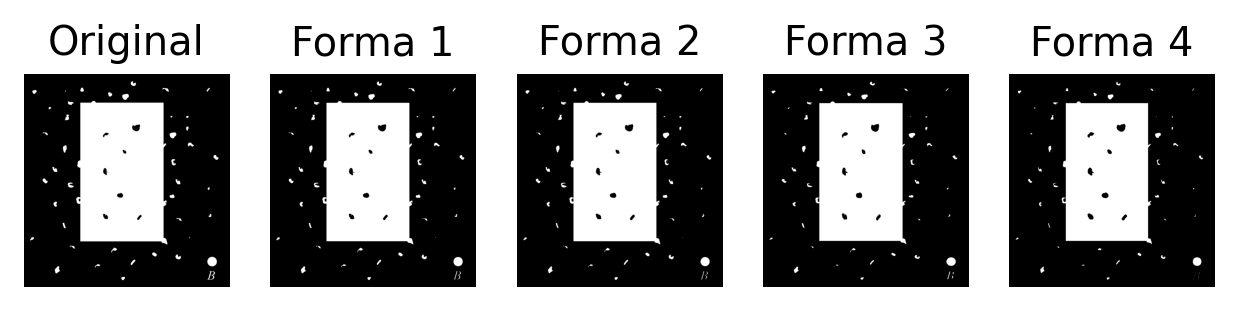

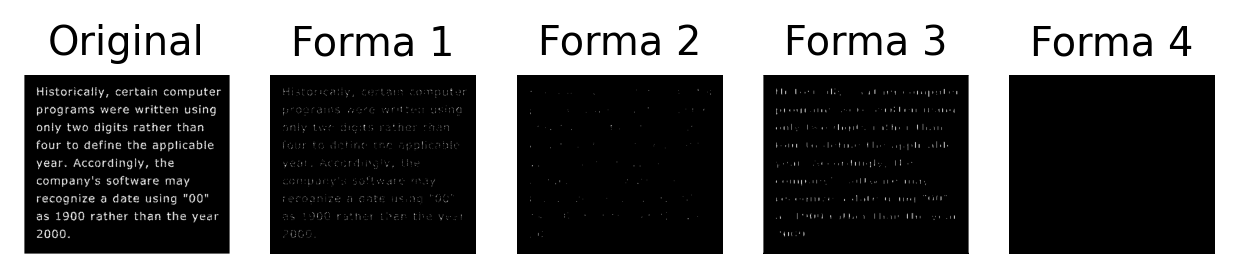

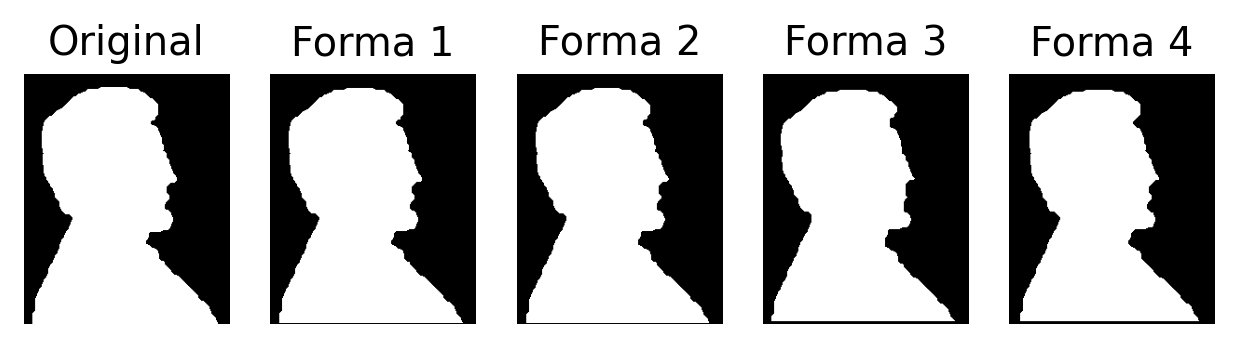

In [68]:
for img in images:
  img_f1 = erosaodilatacao(img, Cross, True, 1)
  img_f2 = erosaodilatacao(img, Sqr, True, 1)
  img_f3 = erosaodilatacao(img, Line, True, 1)
  img_f4 = erosaodilatacao(img, Prism, True, 1)
  plot(img, img_f1,"Forma 1", img_f2,"Forma 2", img_f3,"Forma 3", img_f4,"Forma 4")

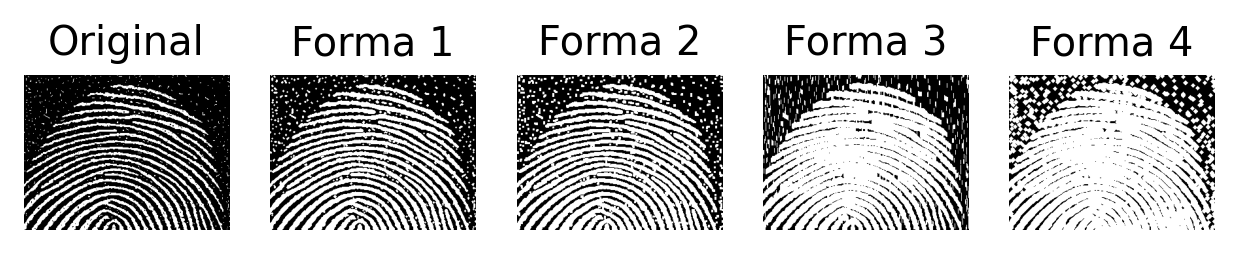

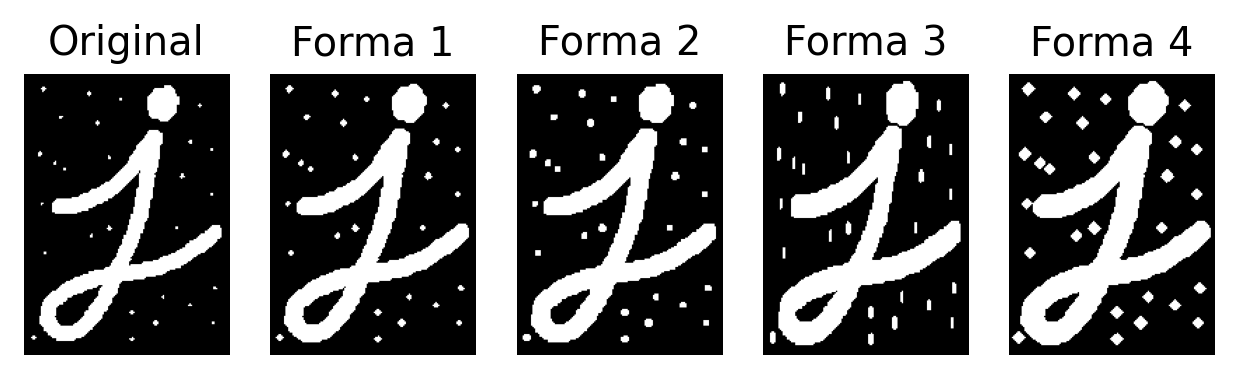

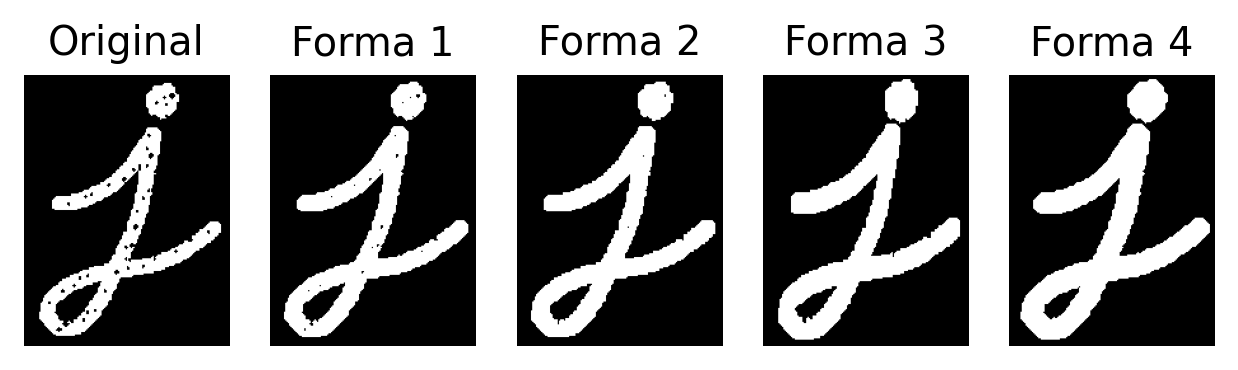

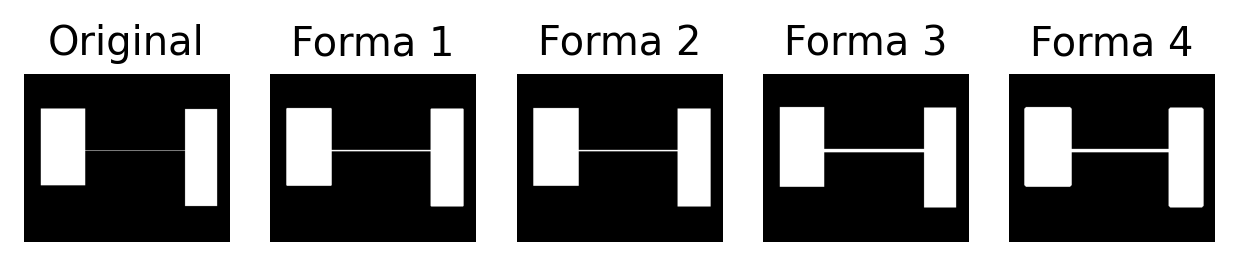

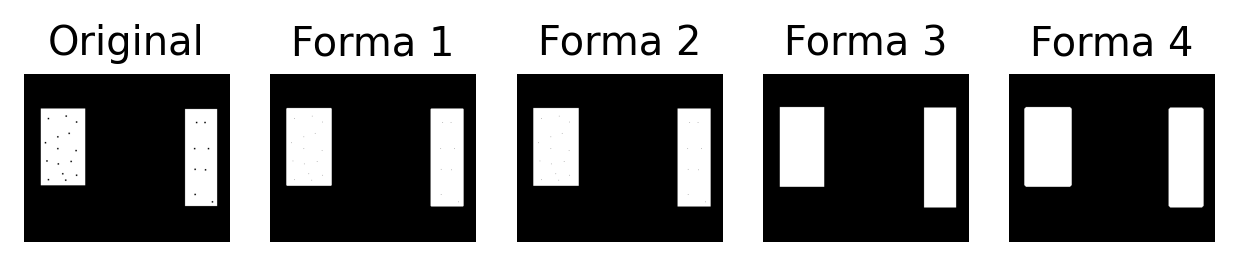

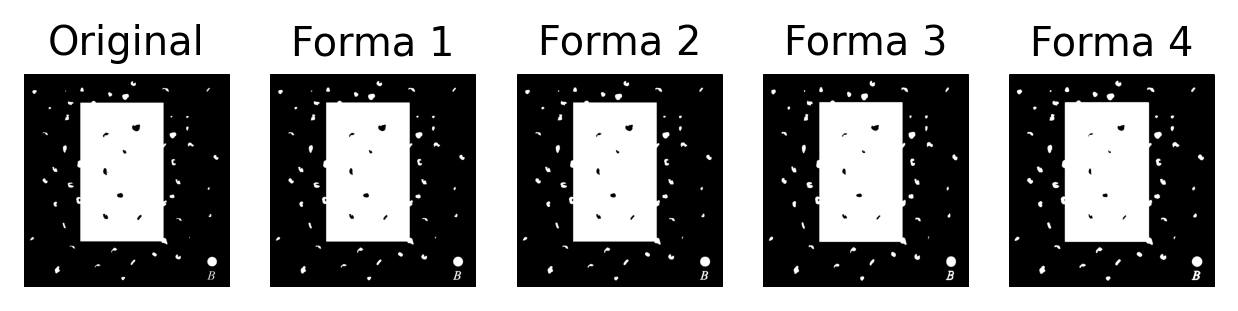

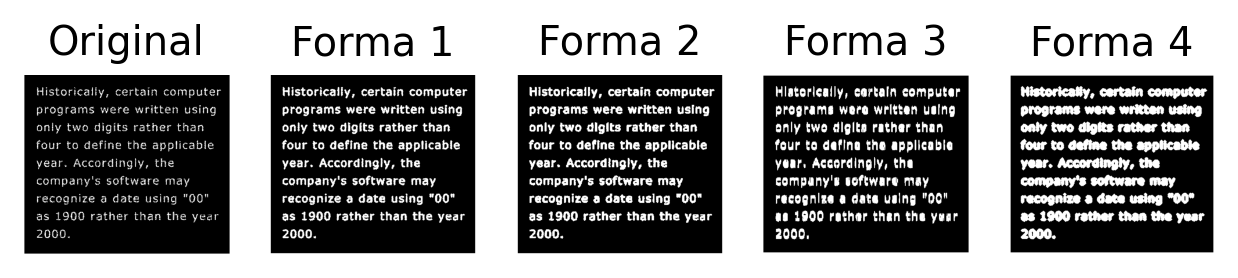

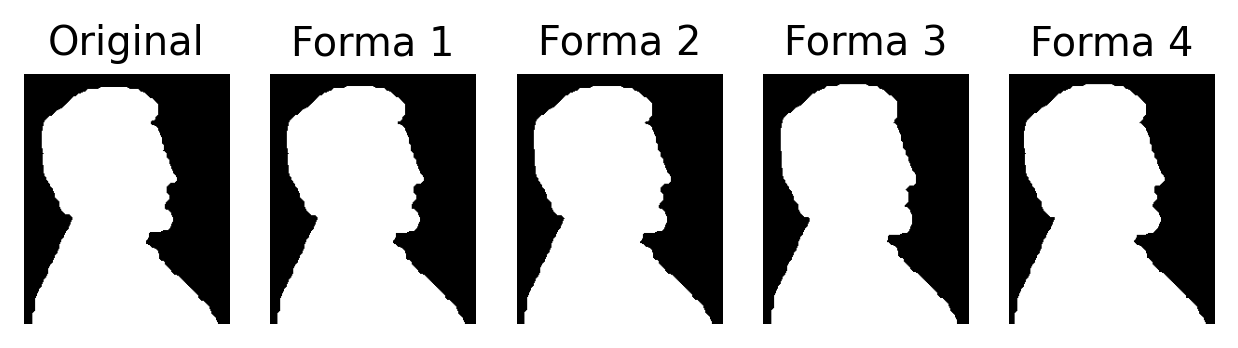

In [69]:
for img in images:
  img_f1 = erosaodilatacao(img, Cross, False, 1)
  img_f2 = erosaodilatacao(img, Sqr, False, 1)
  img_f3 = erosaodilatacao(img, Line, False, 1)
  img_f4 = erosaodilatacao(img, Prism, False, 1)
  plot(img, img_f1,"Forma 1", img_f2,"Forma 2", img_f3,"Forma 3", img_f4,"Forma 4")

###2. Implemente as operações de abertura e fechamento utilizando apenas o primeiro elemento estruturante do exercício acima. Considerando as imagens de b) a e) quais imagens seria mais interessante utilizar a abertura e quais o fechamento para remover os ruídos?


In [70]:
def abertfecham(img, forma, abertura, quant):
  #Converte e copia imagem para uma matriz Numpy
  npImage = np.array(img)

  if abertura: image_out = sp.ndimage.binary_opening(npImage, forma, quant)
  else: image_out = sp.ndimage.binary_closing(npImage, forma, quant)
  return image_out

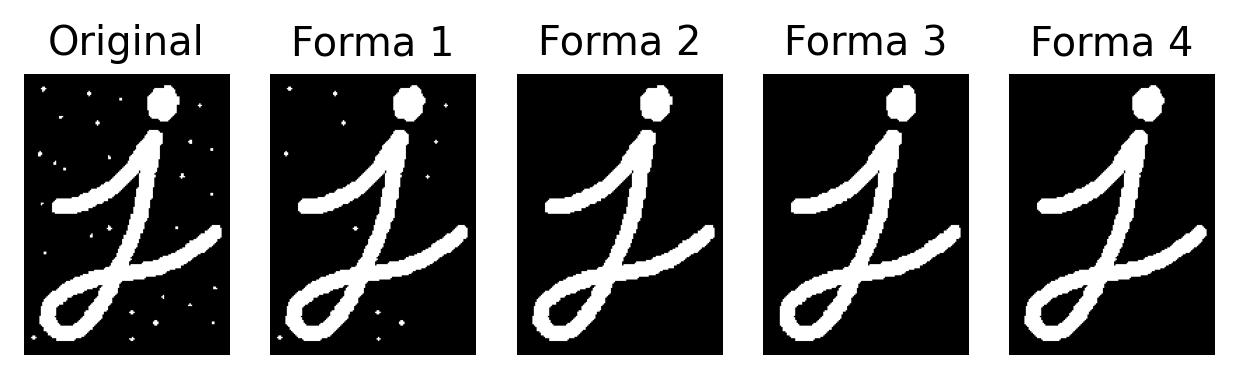

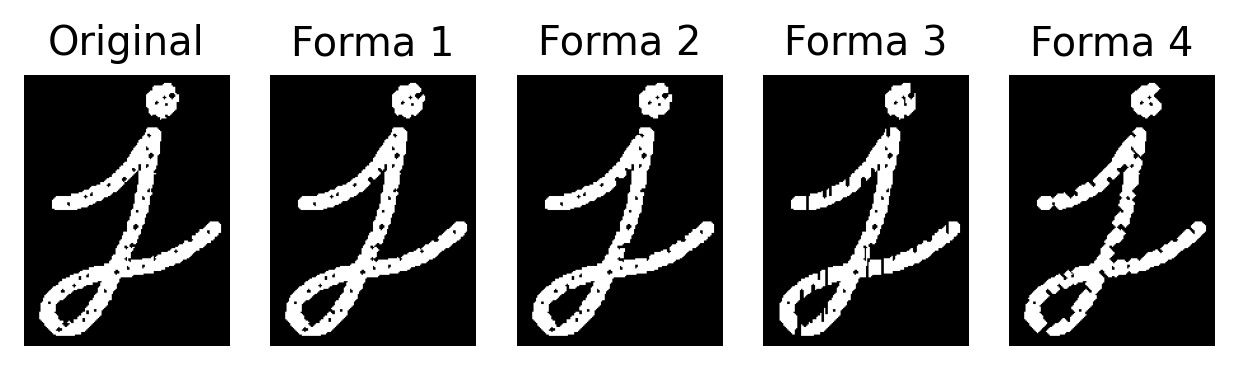

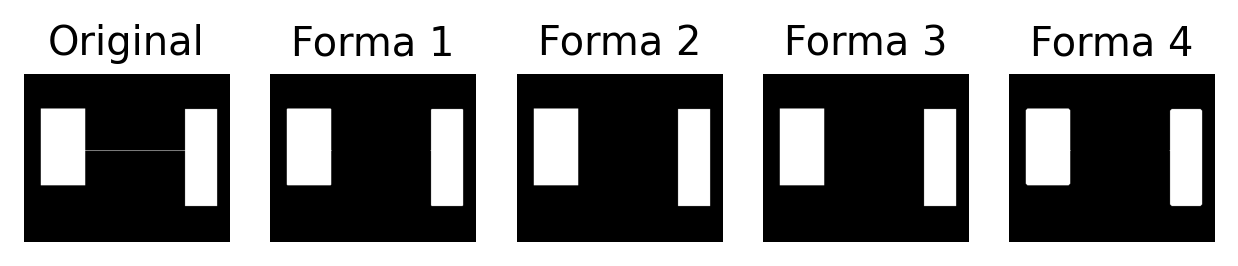

In [71]:
for i in range(1,4):
  img_f1 = abertfecham(images[i], Cross, True, 1)
  img_f2 = abertfecham(images[i], Sqr, True, 1)
  img_f3 = abertfecham(images[i], Line, True, 1)
  img_f4 = abertfecham(images[i], Prism, True, 1)
  plot(images[i], img_f1,"Forma 1", img_f2,"Forma 2", img_f3,"Forma 3", img_f4,"Forma 4")

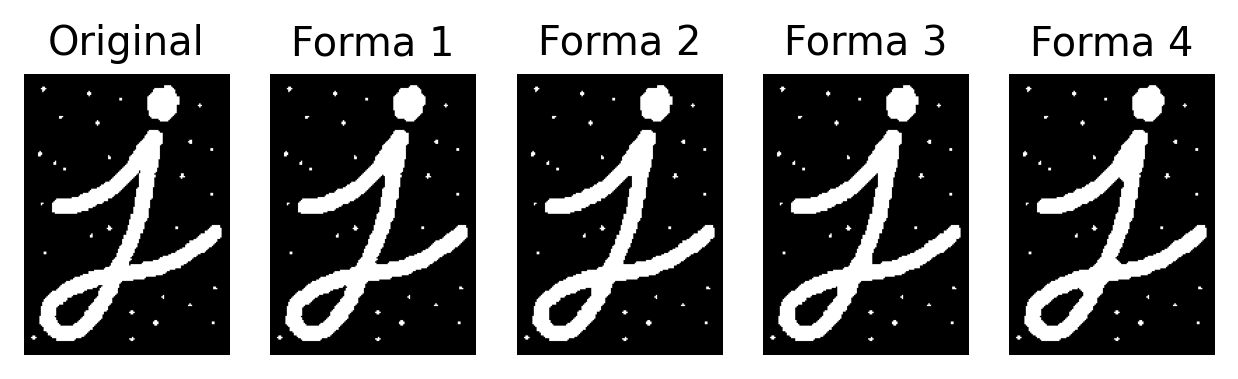

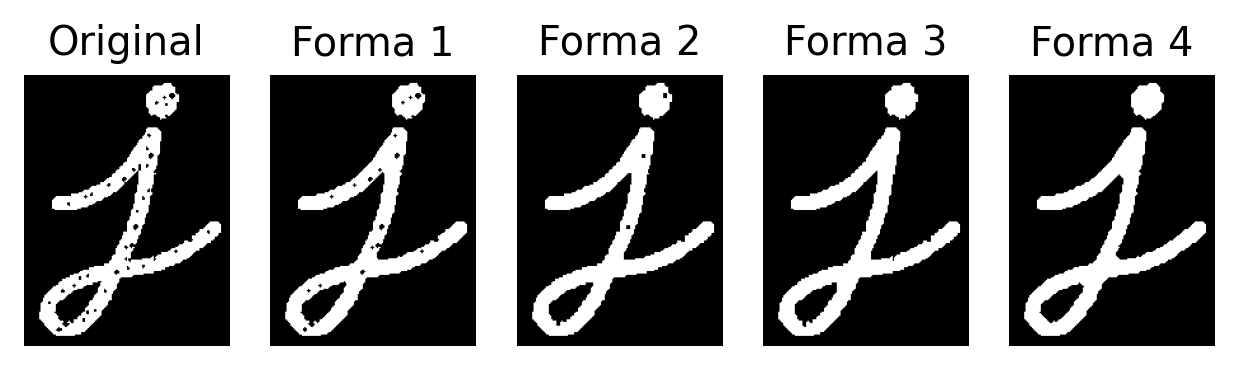

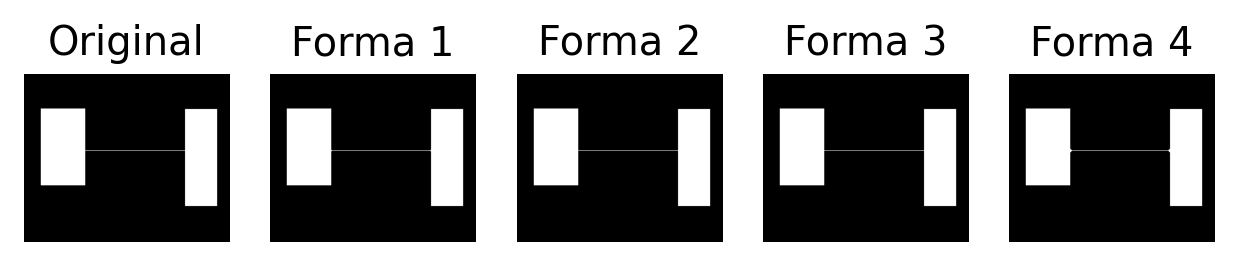

In [72]:
for i in range(1,4):
  img_f1 = abertfecham(images[i], Cross, False, 1)
  img_f2 = abertfecham(images[i], Sqr, False, 1)
  img_f3 = abertfecham(images[i], Line, False, 1)
  img_f4 = abertfecham(images[i], Prism, False, 1)
  plot(images[i], img_f1,"Forma 1", img_f2,"Forma 2", img_f3,"Forma 3", img_f4,"Forma 4")

###3. Qual sequência de operações poderia ser realizadas para que a imagem f) ficasse apenas com um retângulo branco ao centro? Implemente essas operações.

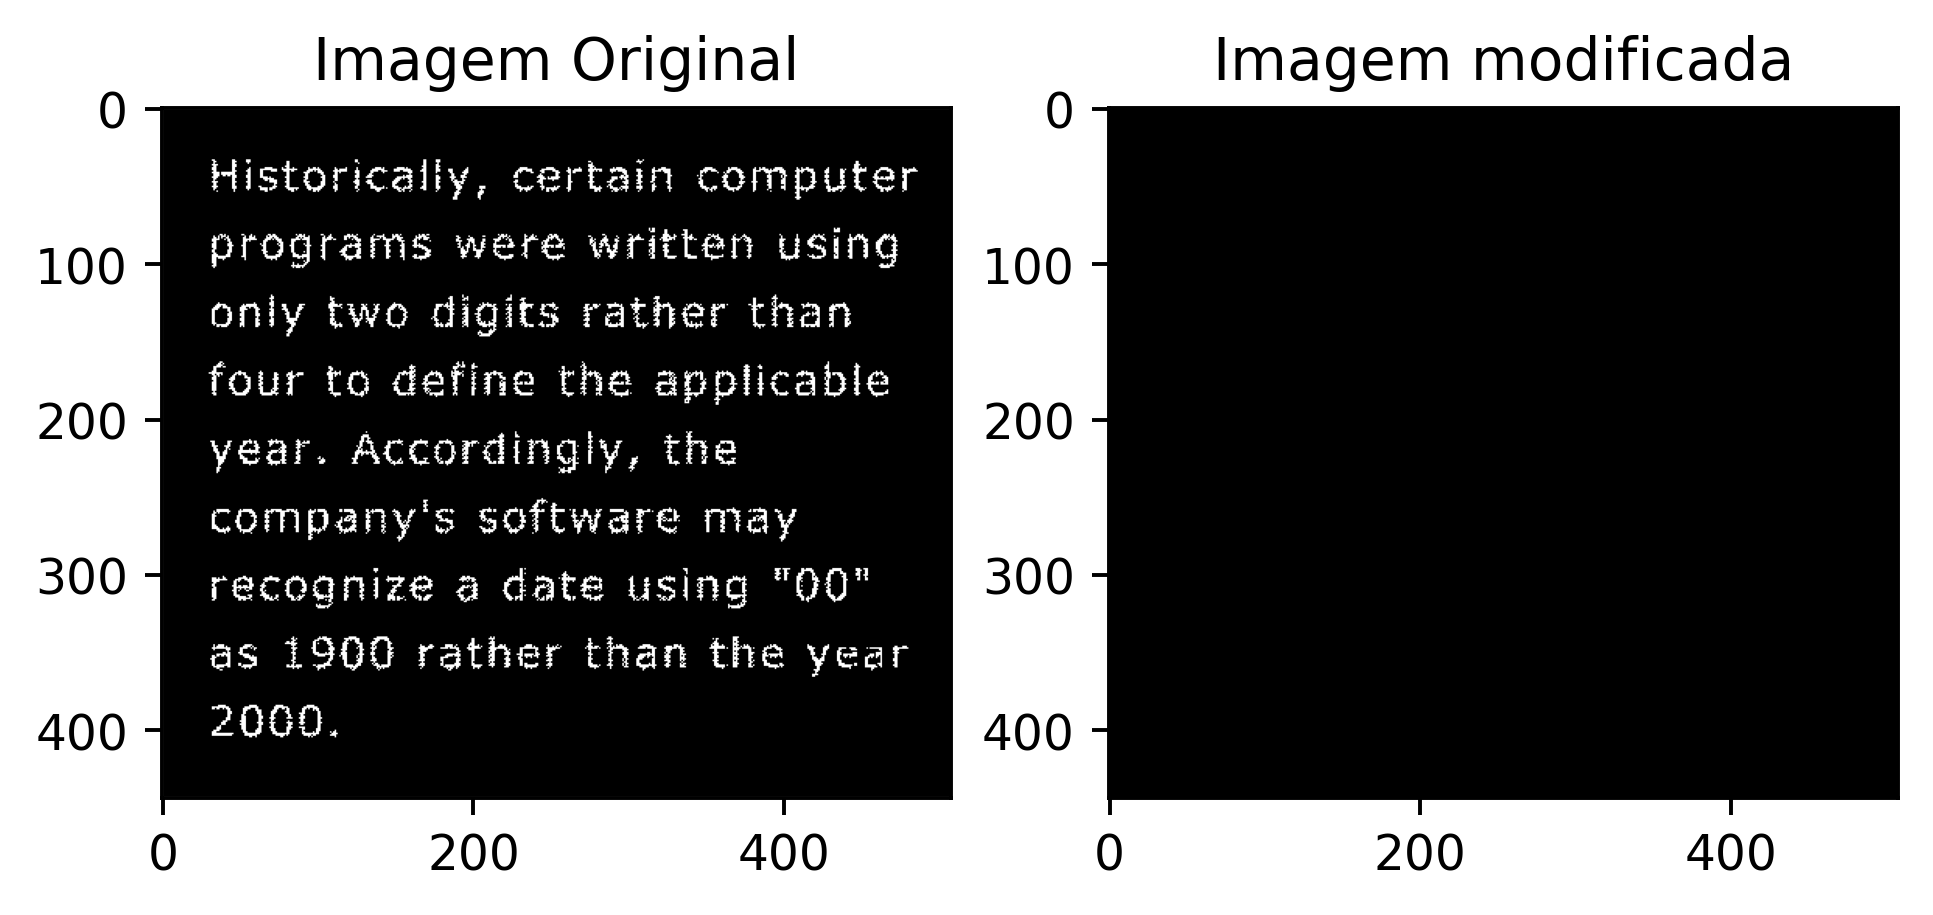

In [73]:
img = images[6]
img_new = erosaodilatacao(img, Sqr, True, 14)
img_new = erosaodilatacao(img_new, Sqr*2, False, 26)
plot2(img, img_new, "Imagem modificada")

###4. Qual(is) operações seriam necessárias para melhorar a imagem g)? Implemente essa(s) operação(ões).

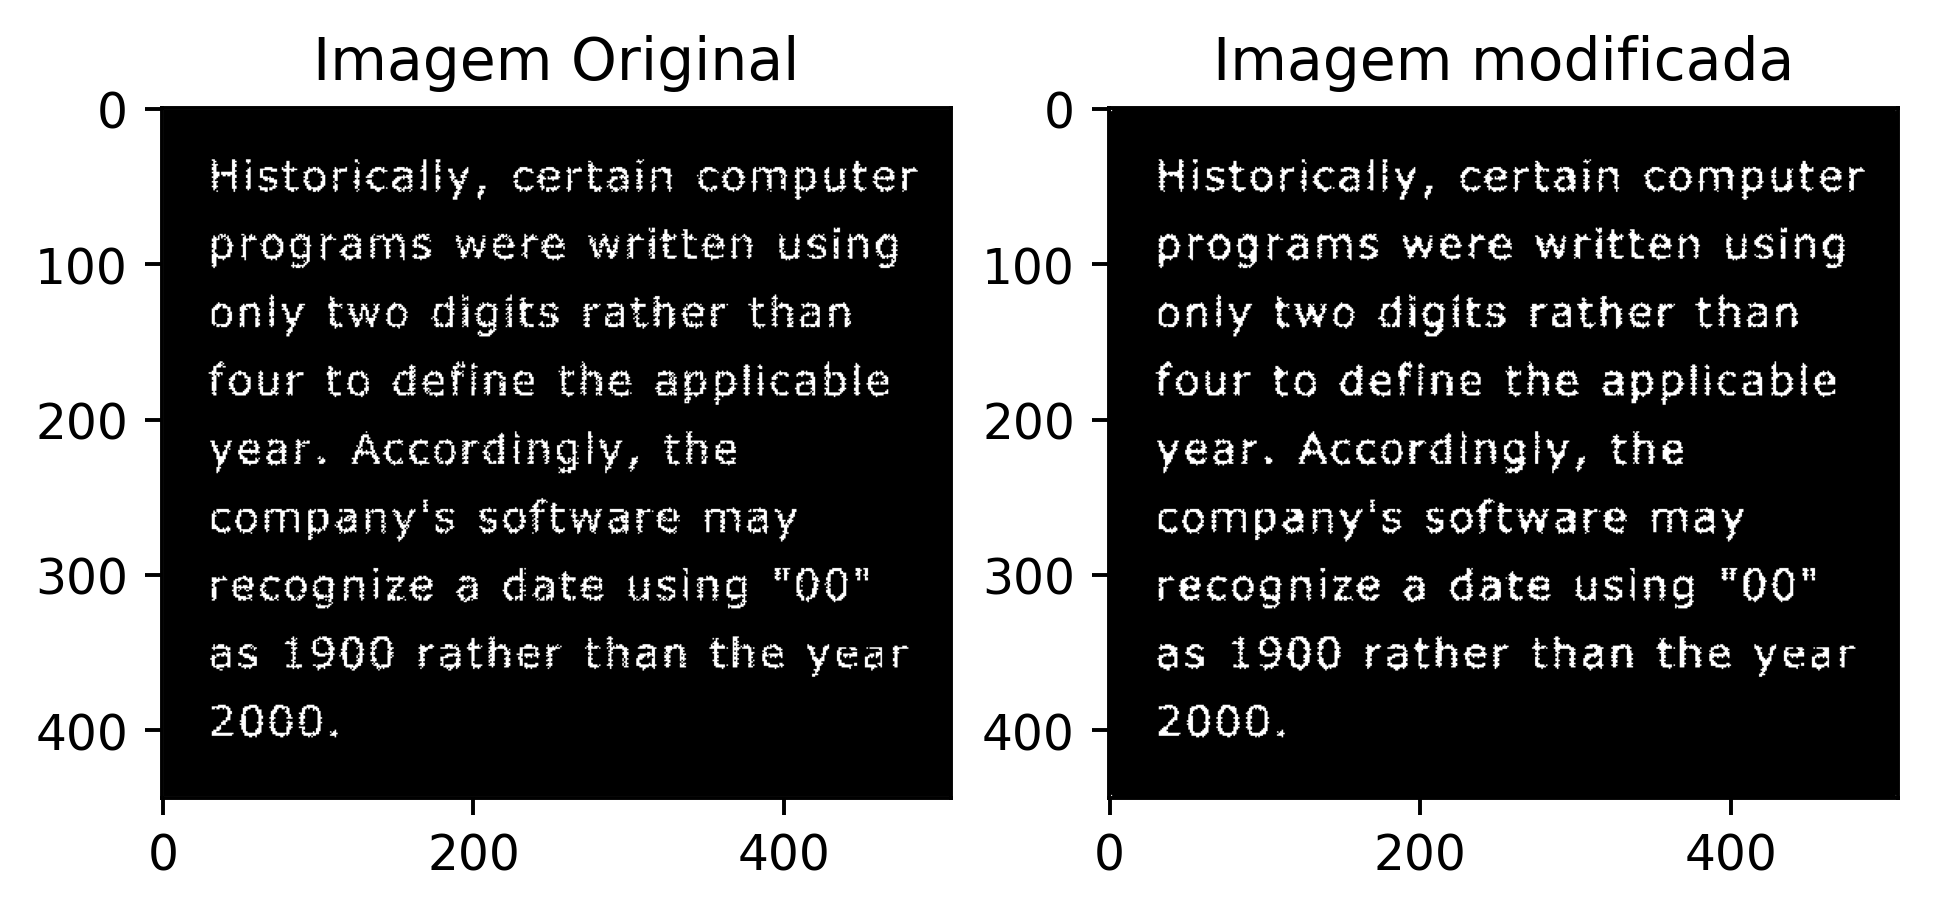

In [74]:
img = images[6]
img_new = abertfecham(img, Cross, False, 1)
plot2(img, img_new, "Imagem modificada")

###5. Quais operações seriam necessárias para extrair apenas a borda da imagem h)? Implemente essas operações.

In [75]:
def obterborda(img, forma):
  #Converte e copia imagem para uma matriz Numpy
  npImage = np.array(img)

  image_ero = sp.ndimage.binary_erosion(npImage, forma)
  image_out = npImage & ~image_ero
  return image_out.astype(int)

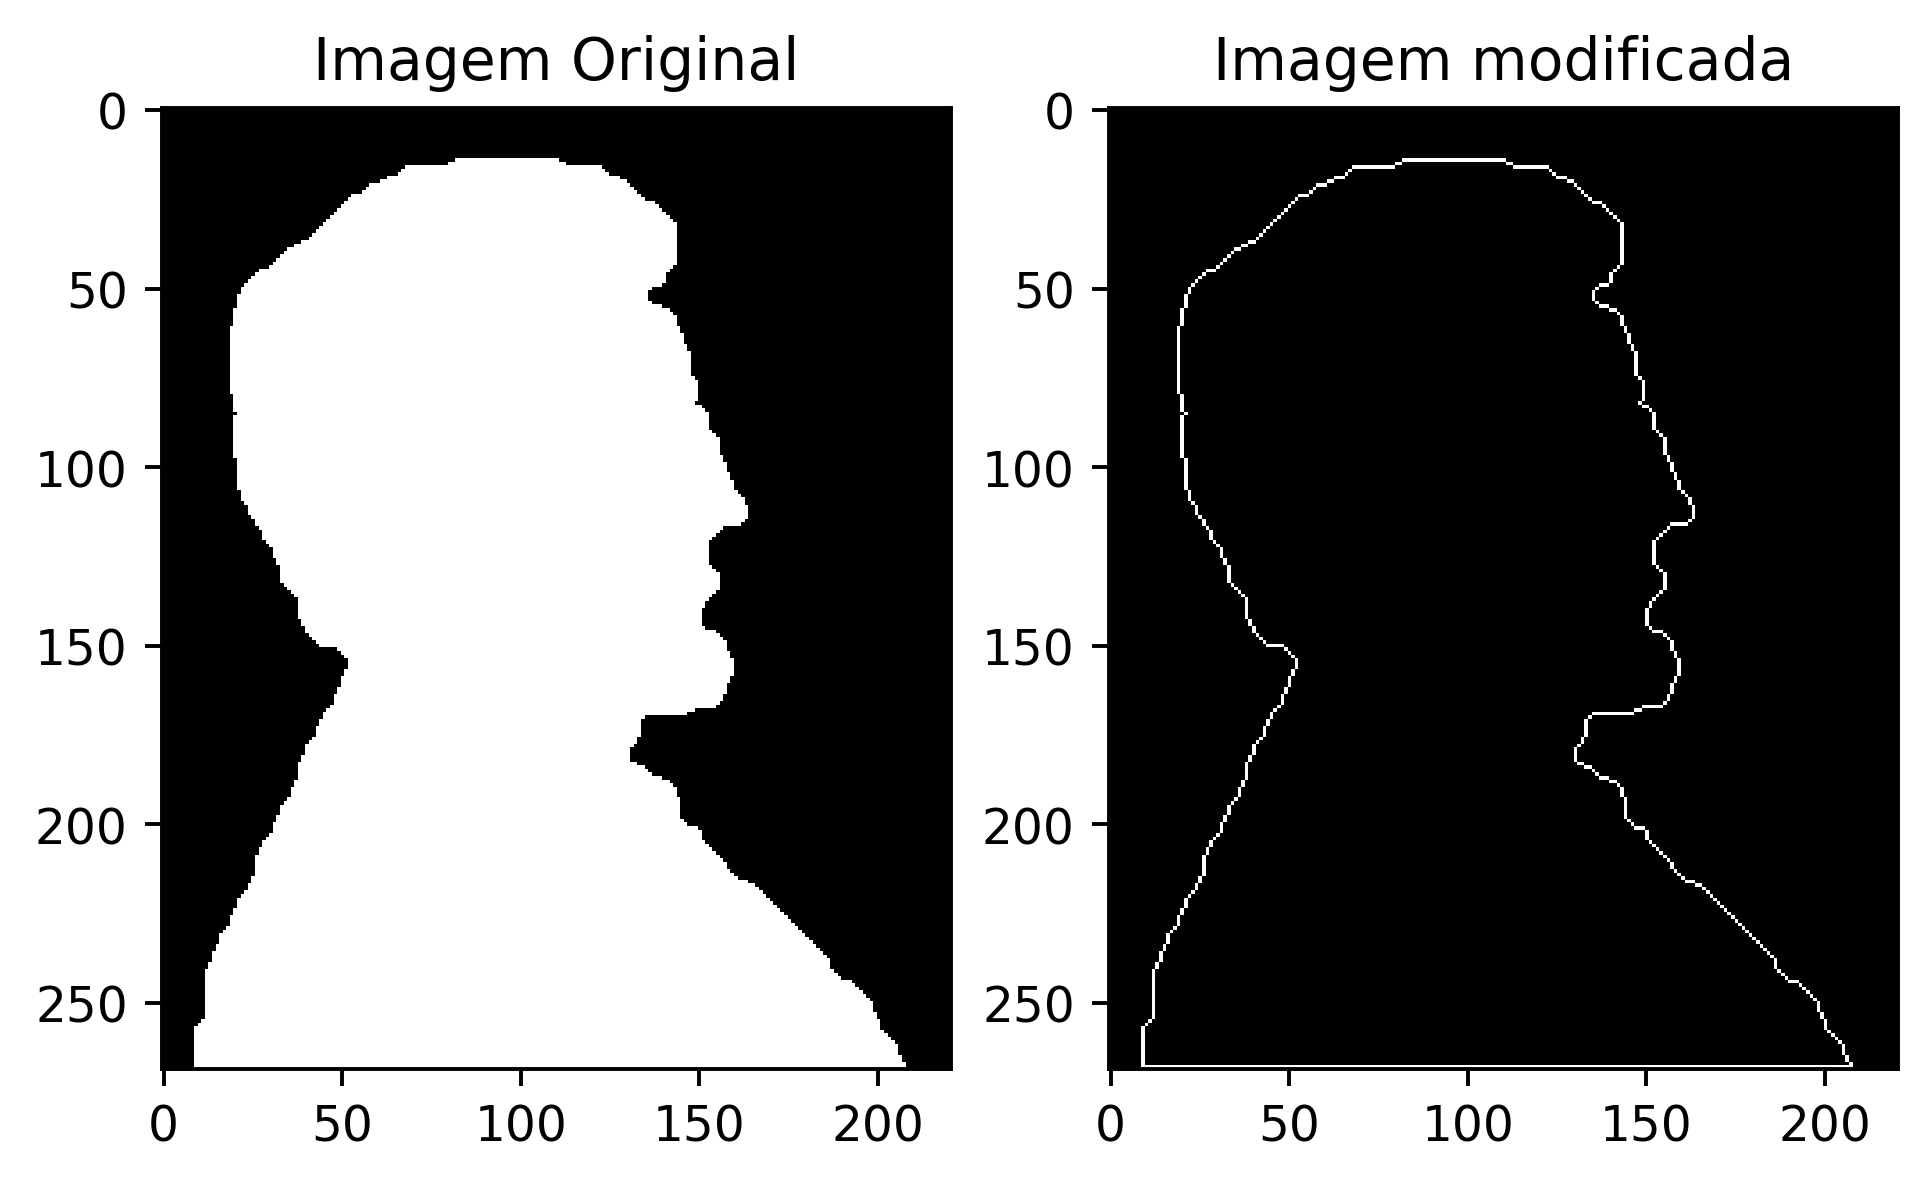

In [76]:
img = images[7]
img_new = obterborda(img, Cross)
plot2(img, img_new, "Imagem modificada")